# Business Objective:

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Goal:

To develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

# Step 1: Reading and Understanding the Data

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
#importing libraries

#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## reading data
bike_data = pd.read_csv('day.csv')

In [6]:
# Check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bike_data.shape

(730, 16)

In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [15]:
#check the columns of data
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [17]:
#check the size of data
bike_data.size

11680

In [18]:
#check the datatypes of data
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [19]:
#check the axes of data
bike_data.axes

[Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             720, 721, 722, 723, 724, 725, 726, 727, 728, 729],
            dtype='int64', length=730),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [21]:
#check the dimensions of data
bike_data.ndim

2

In [22]:
#check the values of data
bike_data.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [24]:
bike_data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [25]:
bike_data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [27]:
#Print number of unique values in all columns
bike_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

From, this we know season, yr, mnth,holiday,weekday,workingday and weathersit are categorical variables.
temp,atemp,hum and windspeeed are continuous variables. cnt the target variable is also a continuous variable.

# Step 2: Clean Data

## Handle Missing/Null values

In [11]:
# checking for the null values in column data

bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# dropping the duplicates
print(bike_data.shape)
bike_data.drop_duplicates(inplace=True)
print(bike_data.shape)

(730, 16)
(730, 16)


As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe as well.
Therefore, no need for Handling missing values

## Dropping irrelevant columns

- `instant` is just a row instance identifier.
- `dteday` is removed as we have some of date features like `mnth` and `year` and `weekday` already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable `cnt` in a very trivial way `target = casual + registered`, which leads to data leakage.

In [23]:
# Droping instant column as it is index column which has nothing to do with target
bike_data.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike_data.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike_data.drop(['casual'], axis = 1, inplace = True)
bike_data.drop(['registered'], axis = 1, inplace = True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
bike_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


Clearly holiday,weeekday,workingday,weathersit,temp,atemp,hum,windspeed are highly correlated out of which temp,atemp are the most related.

### Handle Outliers

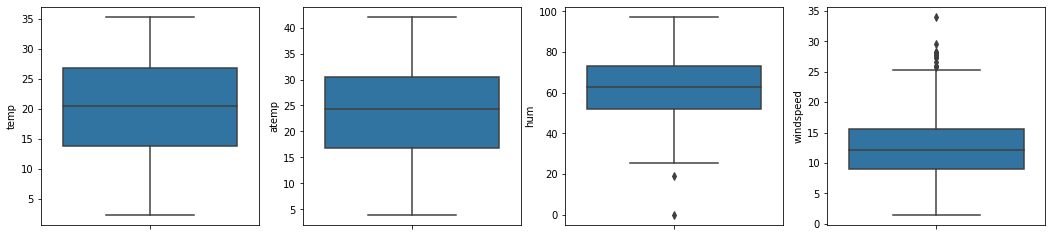

In [30]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_data)
    i+=1

#### From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

In [32]:
bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Since the difference between mean and median is not much , we can conclude that data has no outliers

# Step 3: EDA: Visualising the Data

#### Convert season and  weathersit to categorical types

In [33]:
bike_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_data.mnth = bike_data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_data.weekday = bike_data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


#### Draw pair Plots to check the linear relationship

<Figure size 1080x2160 with 0 Axes>

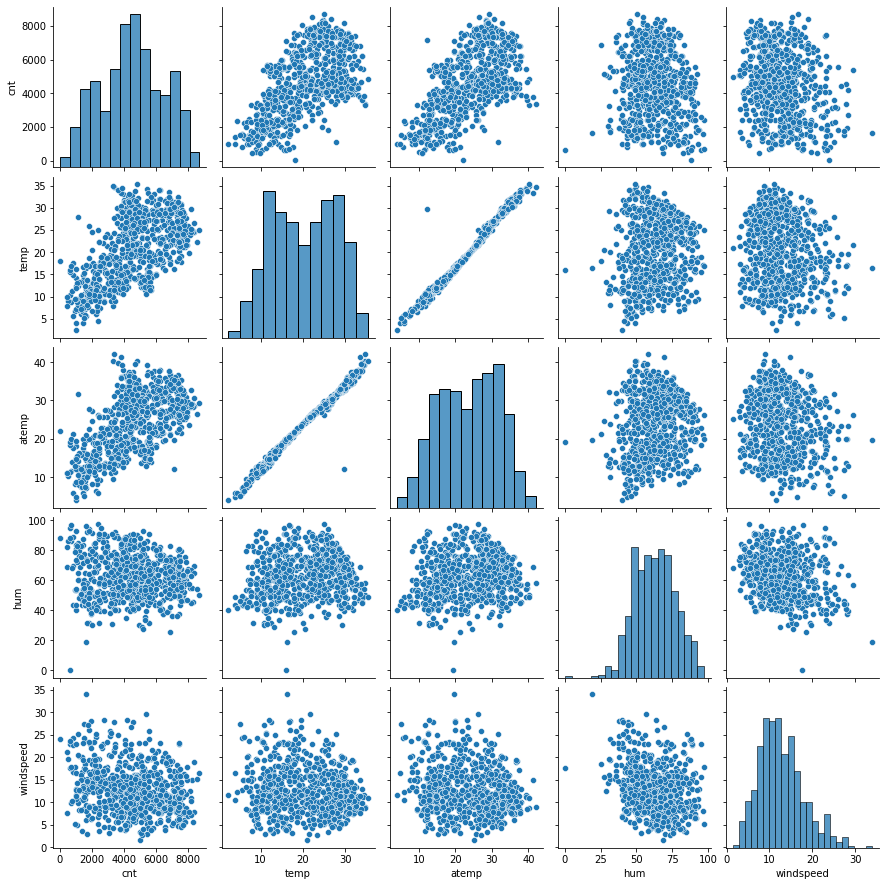

In [36]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Clearly atemp and temp are linearly highly correlated and one of them can be dropped as they are highly related with cnt.

#### Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 1440x1080 with 0 Axes>

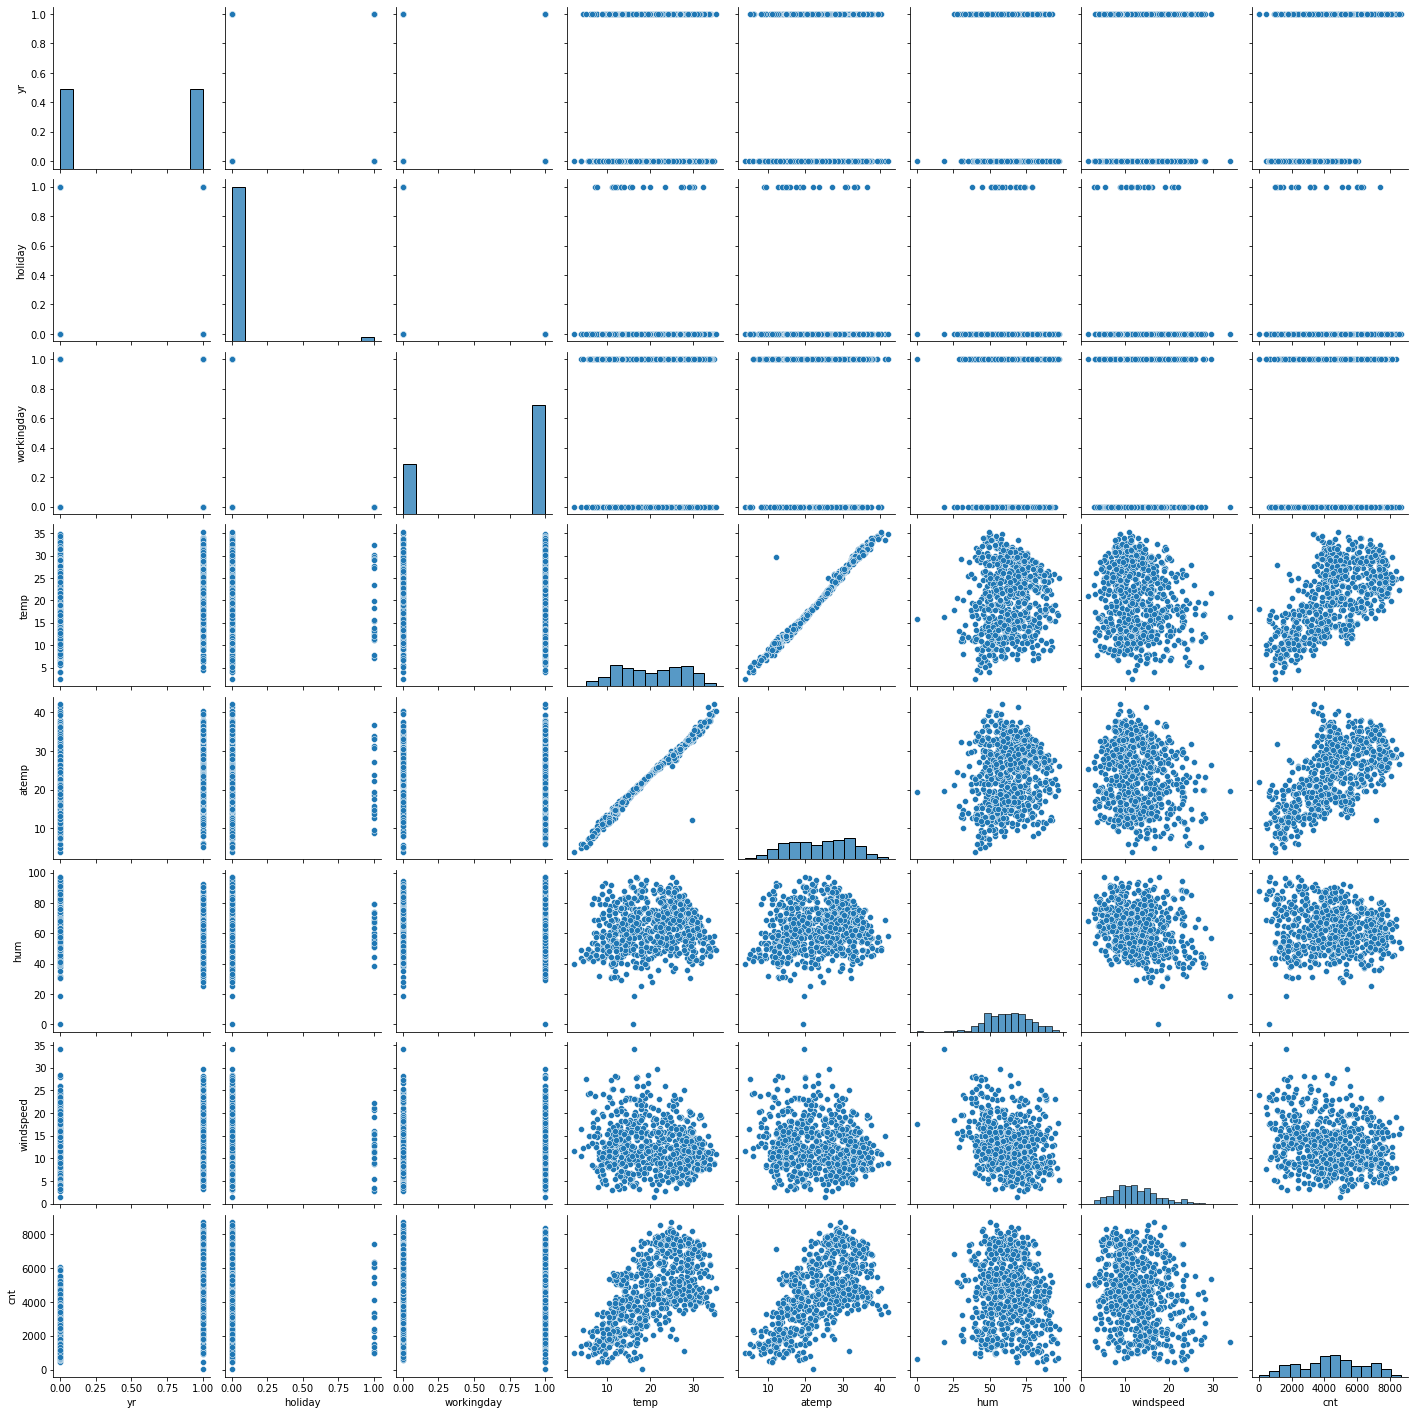

In [37]:
plt.figure(figsize=(20,15))
sns.pairplot(bike_data)
plt.show()

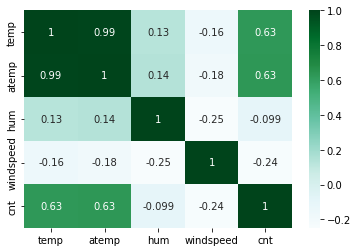

In [38]:
# Checking continuous variables relationship with each other
sns.heatmap(bike_data[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

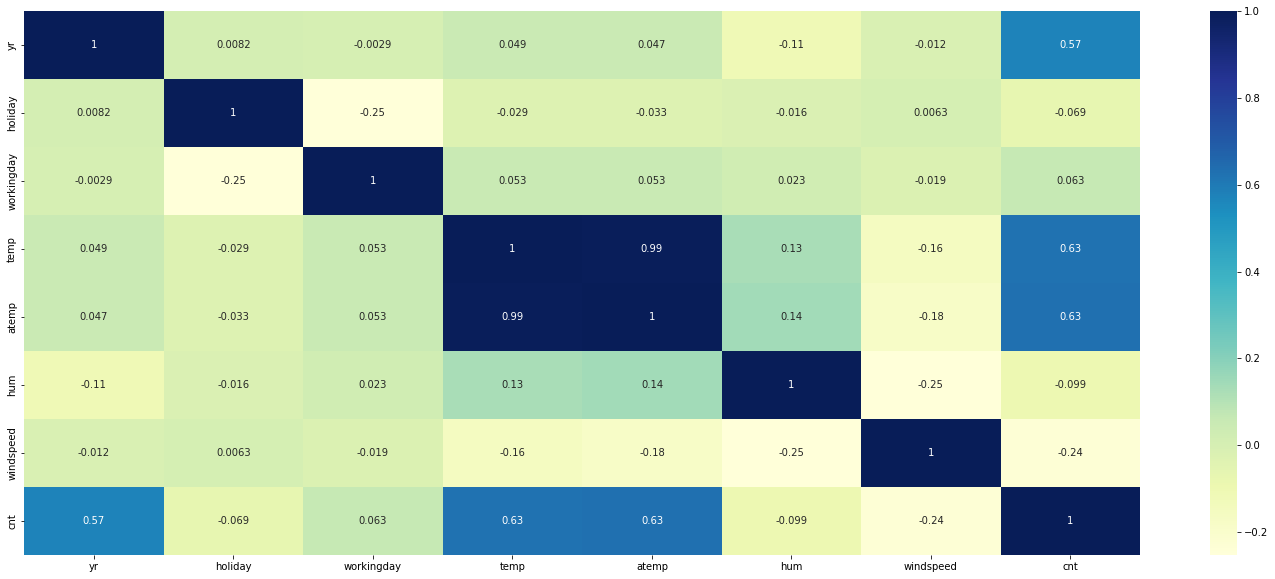

In [40]:
#Correlations for numeric variables
cor=bike_data.corr()
plt.figure(figsize=(25,10))
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

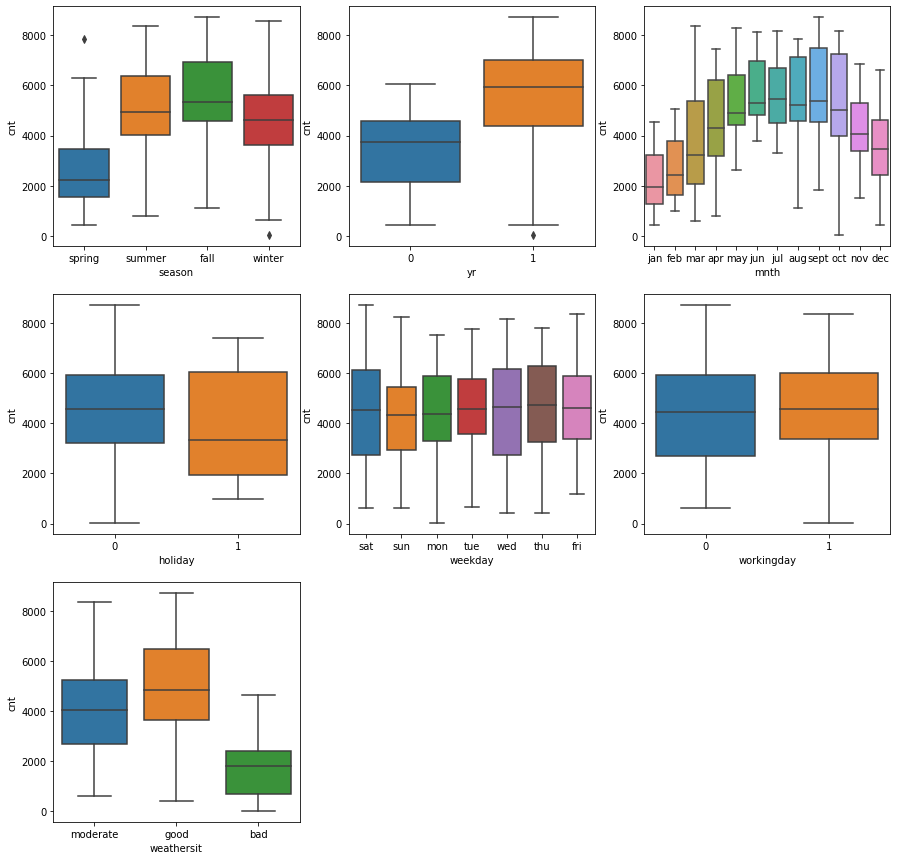

In [41]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_data, x=i[1], y='cnt')
plt.show()


#### _`Inference`_:
    Here many insights can be drawn from the plots

    1. Season: 3:fall has highest demand for rental bikes
    2. I see that demand for next year has grown
    3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The clear weathershit has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.
    
- The count of bike sharing is least for spring
- The number of bike shares incresed in 2019
- The cnt has zero values for weather situation - 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'(cat no 4)
- The cnt values increases in summer months
- The cnt values ars less during holidays

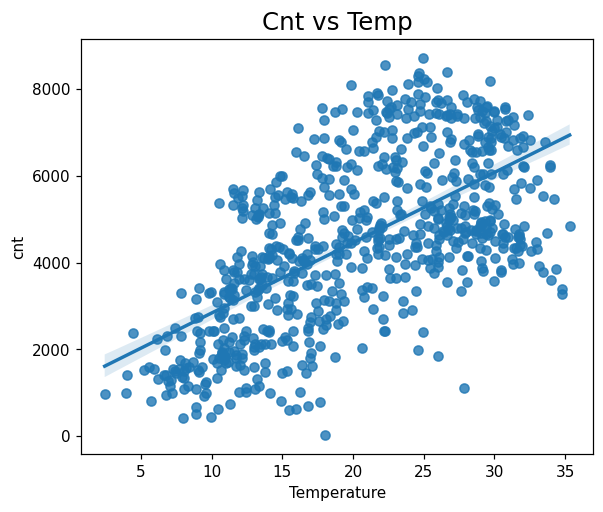

In [42]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike_data,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### _`Inference`_:
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

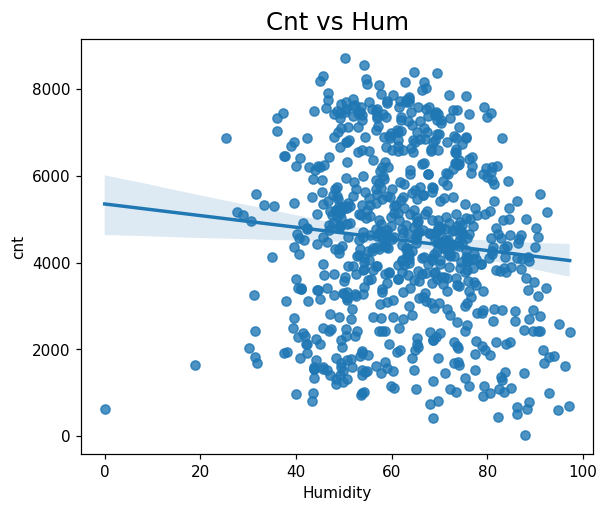

In [44]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bike_data,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### _`Inference`_:
- Hum is values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.

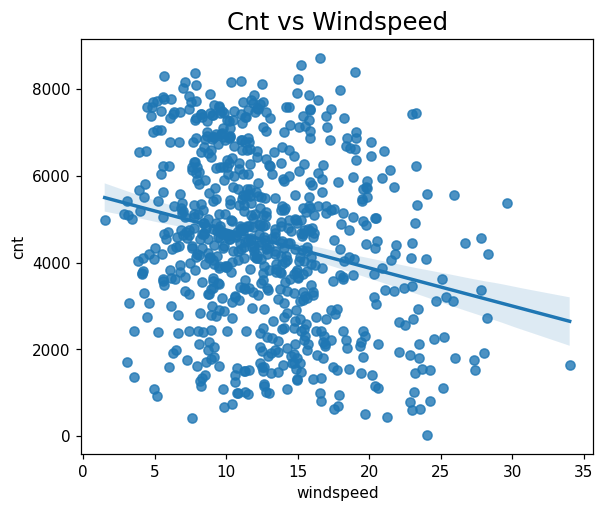

In [46]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bike_data,y="cnt",x="windspeed")
plt.show()

#### _`Inference`_:
- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

# Step 3: Data Preparation

### Dummy Variables

In [55]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy = bike_data[['season','mnth','weekday','weathersit']]

In [56]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [57]:
## adding dummy variables to original dataset
bike_data = pd.concat([dummy,bike_data],axis = 1)

In [58]:
# Now let's see the head of our dataframe.
bike_data.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [59]:
## dropping columns for which dummy variables were created
bike_data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [60]:
bike_data.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [61]:
bike_data.shape

(730, 30)

# Step 4: Splitting the Data into Training and Testing Sets

In [167]:
train, test = train_test_split(bike_data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [168]:
# Checking shape and size for train and test
print(train.shape)
print(test.shape)

(584, 30)
(146, 30)


# Step 5 :Rescaling the Features

In [169]:
scaler = MinMaxScaler()

In [170]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [171]:
train.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
367,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717
648,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385
44,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556
705,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0.326094,0.318824,0.787463,0.189819,0.573631
379,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0.133996,0.108365,0.431945,0.449210,0.263346


In [172]:
train.describe()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.251712,0.246575,0.250000,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,...,0.630137,0.342466,0.513699,0.027397,0.667808,0.537414,0.513175,0.649499,0.319463,0.515792
std,0.434369,0.431387,0.433384,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,...,0.483181,0.474941,0.500241,0.163378,0.471403,0.225336,0.211663,0.144219,0.168114,0.225336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837
75%,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


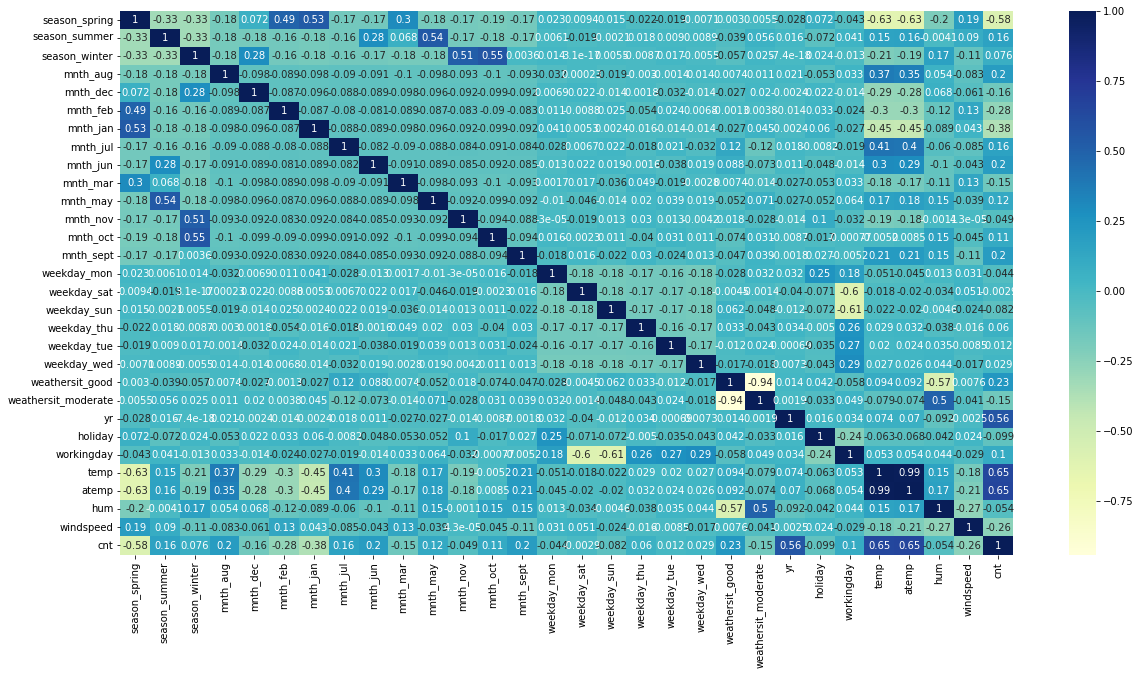

In [173]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

# Dividing into X and Y sets for the model building

In [174]:
y_train = train.pop('cnt')
X_train = train

# Step 6: Building a linear model

Fit a regression line through the training data using statsmodels. In statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [175]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
# n_features_to_select
rfe = RFE(lm,n_features_to_select=18)        
rfe = rfe.fit(X_train, y_train)

In [176]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 8),
 ('mnth_mar', False, 11),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 9),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 4),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 5),
 ('weekday_wed', False, 12),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1)]

Starting with all the columns selected by RFE

In [177]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_dec',
       'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_sat',
       'weekday_sun', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [178]:
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed', 'atemp'],
      dtype='object')

## Model 1

In [179]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [180]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [181]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [182]:
# Check the parameters obtained
lm.params

const                  0.022399
season_spring         -0.069885
season_summer          0.041052
season_winter          0.109420
mnth_dec              -0.048201
mnth_jan              -0.043345
mnth_jul              -0.051895
mnth_nov              -0.054245
mnth_sept              0.065456
weekday_sat            0.050713
weekday_sun           -0.009936
weathersit_good        0.260127
weathersit_moderate    0.201599
yr                     0.227822
holiday               -0.059354
workingday             0.040975
temp                   0.477601
hum                   -0.146227
windspeed             -0.184755
dtype: float64

In [183]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     198.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.97e-225
Time:                        21:21:35   Log-Likelihood:                 608.71
No. Observations:                 584   AIC:                            -1181.
Df Residuals:                     566   BIC:                            -1103.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0224    

# Checking VIF for multicollinearity

In [184]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,weekday_sat,inf
10,weekday_sun,inf
14,holiday,inf
15,workingday,inf
11,weathersit_good,11.03
12,weathersit_moderate,9.51
1,season_spring,5.39
16,temp,4.45
3,season_winter,3.63
2,season_summer,2.74


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [190]:
X_train_new = X_train_new.drop(['const'], axis=1)

### Model 2

In [191]:
# Adding a constant variable 
# X_train_rfe = sm.add_constant(X_train_rfe)
# Create a first fitted model
lm = sm.OLS(y_train,X_train_new).fit()
# Print a summary of the linear regression model obtained
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              1417.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                        0.00
Time:                        21:23:29   Log-Likelihood:                          608.67
No. Observations:                 584   AIC:                                     -1183.
Df Residuals:                     567   BIC:                                     -1109.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [192]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,hum,26.92
14,temp,25.93
9,weathersit_good,16.55
10,weathersit_moderate,9.81
0,season_spring,5.95
13,workingday,5.14
16,windspeed,4.71
2,season_winter,4.34
1,season_summer,3.28
11,yr,2.12


In [193]:
X_train_new = X_train_new.drop(['hum'], axis=1)

### Model 3

In [194]:
# Adding a constant variable 
# X_train_rfe = sm.add_constant(X_train_rfe)
# Create a first fitted model
lm = sm.OLS(y_train,X_train_new).fit()
# Print a summary of the linear regression model obtained
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1443.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                        0.00
Time:                        21:25:48   Log-Likelihood:                          595.94
No. Observations:                 584   AIC:                                     -1160.
Df Residuals:                     568   BIC:                                     -1090.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [195]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,weathersit_good,16.55
14,temp,15.72
10,weathersit_moderate,9.29
13,workingday,5.09
15,windspeed,4.70
0,season_spring,4.66
2,season_winter,3.37
1,season_summer,2.84
11,yr,2.09
8,weekday_sat,1.92


In [196]:
X_train_new = X_train_new.drop(['season_summer'], axis=1)

### Model 4

In [198]:
# Adding a constant variable 
#X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_new).fit() 

In [199]:
# Check the summary
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1536.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                        0.00
Time:                        21:35:27   Log-Likelihood:                          594.82
No. Observations:                 584   AIC:                                     -1160.
Df Residuals:                     569   BIC:                                     -1094.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [200]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,temp,15.17
8,weathersit_good,13.69
9,weathersit_moderate,7.59
12,workingday,5.02
14,windspeed,4.43
0,season_spring,3.12
1,season_winter,2.51
10,yr,2.08
7,weekday_sat,1.91
5,mnth_nov,1.75


In [201]:
X_train_new = X_train_new.drop(['holiday'], axis=1)

### Model 5

In [202]:
# Adding a constant variable 
# X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_new).fit() 

In [203]:
# Check the summary
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1636.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                        0.00
Time:                        21:41:13   Log-Likelihood:                          592.75
No. Observations:                 584   AIC:                                     -1157.
Df Residuals:                     570   BIC:                                     -1096.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [204]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,15.06
8,weathersit_good,13.62
9,weathersit_moderate,7.56
11,workingday,4.44
13,windspeed,4.41
0,season_spring,3.10
1,season_winter,2.51
10,yr,2.08
7,weekday_sat,1.78
5,mnth_nov,1.72


In [205]:
X_train_new = X_train_new.drop(['weathersit_good'], axis=1)

### Model 6

In [206]:
# Adding a constant variable 
#X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_new).fit()

In [207]:
# Check the summary
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              1200.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:36:45   Log-Likelihood:                          483.36
No. Observations:                 584   AIC:                                     -940.7
Df Residuals:                     571   BIC:                                     -883.9
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [208]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,6.61
10,workingday,4.32
12,windspeed,4.20
0,season_spring,2.44
1,season_winter,2.38
9,yr,2.07
7,weekday_sat,1.75
5,mnth_nov,1.67
3,mnth_jan,1.62
8,weathersit_moderate,1.52


In [209]:
X_train_new = X_train_new.drop(['workingday'], axis=1)

### Model 7

In [217]:
# Adding a constant variable 
#X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_new).fit() 

In [218]:
# Check the summary
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              1195.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:41:36   Log-Likelihood:                          459.18
No. Observations:                 584   AIC:                                     -894.4
Df Residuals:                     572   BIC:                                     -841.9
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [212]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,4.77
11,windspeed,4.10
0,season_spring,2.35
1,season_winter,2.33
9,yr,2.07
5,mnth_nov,1.66
3,mnth_jan,1.61
8,weathersit_moderate,1.50
2,mnth_dec,1.42
4,mnth_jul,1.36


### Model 8

In [219]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()

In [220]:
# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     185.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.77e-188
Time:                        22:42:53   Log-Likelihood:                 505.79
No. Observations:                 584   AIC:                            -985.6
Df Residuals:                     571   BIC:                            -928.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2697    

In [222]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.57
11,temp,3.38
1,season_spring,2.83
2,season_winter,2.14
6,mnth_nov,1.60
4,mnth_jan,1.59
3,mnth_dec,1.40
5,mnth_jul,1.30
7,mnth_sept,1.11
12,windspeed,1.10


# Step 7: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [224]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

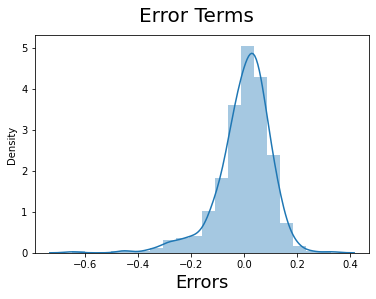

In [225]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Step 8: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. third model.
Applying the scaling on the test sets

In [226]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [227]:
test.describe()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.226027,0.273973,0.219178,0.061644,0.075342,0.089041,0.075342,0.123288,0.102740,0.061644,...,0.650685,0.315068,0.445205,0.034247,0.746575,0.569603,0.542752,0.635933,0.315127,0.517368
std,0.419697,0.447530,0.415114,0.241335,0.264852,0.285783,0.264852,0.329899,0.304664,0.241335,...,0.478395,0.466142,0.498699,0.182488,0.436469,0.238088,0.222120,0.156357,0.161524,0.212757
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.055683
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.359075,0.346732,0.534457,0.196160,0.391251
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.560248,0.544652,0.614856,0.306383,0.508916
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.801929,0.743337,0.730570,0.411976,0.649994
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.800793,0.963300


# Dividing into X_test and y_test

In [228]:
y_test = test.pop('cnt')
X_test = test

In [229]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [230]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                146 non-null    float64
 1   season_spring        146 non-null    uint8  
 2   season_winter        146 non-null    uint8  
 3   mnth_dec             146 non-null    uint8  
 4   mnth_jan             146 non-null    uint8  
 5   mnth_jul             146 non-null    uint8  
 6   mnth_nov             146 non-null    uint8  
 7   mnth_sept            146 non-null    uint8  
 8   weekday_sat          146 non-null    uint8  
 9   weathersit_moderate  146 non-null    uint8  
 10  yr                   146 non-null    int64  
 11  temp                 146 non-null    float64
 12  windspeed            146 non-null    float64
dtypes: float64(3), int64(1), uint8(9)
memory usage: 7.0 KB


In [231]:
# Making predictions using the fourth model

y_pred = lm.predict(X_test)

In [234]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7706080775505357

In [235]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.010312423002763705

# Step 9: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

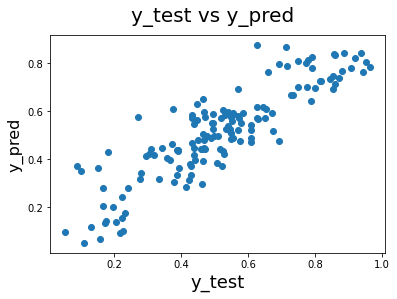

In [236]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [238]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
11,temp,0.431064
0,const,0.269696
10,yr,0.237174
2,season_winter,0.060283
7,mnth_sept,0.031973
8,weekday_sat,0.022236
4,mnth_jan,-0.045705
3,mnth_dec,-0.058206
6,mnth_nov,-0.060788


### We can see that the equation of our best fitted line is:

cnt = 0.269696 + 0.431064 X temp + 0.237174 X yr + 0.060283 X season_winter + 0.031973 X mnth_sept + 0.022236 X weekday_sat -0.045705 X mnth_jan -0.058206 X mnth_dec -0.060788 X mnth_nov -0.065699 X weathersit_moderate -0.072481 X mnth_jul -0.110967 X season_spring -0.183234 X windspeed 


All the positive coefficients like yr,weekday_Saturday,mnth_Sep,mnth_Jul............ indicate that an increase in these values will lead to an increase in the value of cnt.

All the negative coefficients like indicate that an increase in these values will lead to an decrease in the value of cnt.

temp is the most significant with the largest coefficient.